In [32]:
import pickle

import numpy as np
import pandas as pd
from scipy.ndimage import zoom


def fcgr(seq: str, k: int=8):
    letter_to_num = {
        'A': 0, 'C': 1, 'G': 2, 'T': 3,
    }

    letter_to_x = {
        'A': 0, 'C': 1, 'G': 0, 'T': 1,
    }

    letter_to_y = {
        'A': 0, 'C': 0, 'G': 1, 'T': 1
    }

    IMGSIZE = 2 ** k
    img = np.zeros((IMGSIZE, IMGSIZE))

    substrs = [seq[i:i+k] for i in range(len(seq)-k+1)]

    for substr in substrs:
        x = 0
        y = 0
        for i, s in enumerate(substr):
            x = x + letter_to_x[s] * IMGSIZE/(2 ** (i+1))
            y = y + letter_to_y[s] * IMGSIZE / (2 ** (i+1))
        img[int(y), int(x)] += 1

    return img



In [33]:

TARGET_WIDTH = 224
KMER_LEN = 7
df = pd.read_csv('../../data/sequences_annotations.tsv').head()
anns = df.annotation.tolist()
seqs = df.sequence.tolist()

#preprocess_inputs(sequences, annotations)
imgs = [fcgr(seq, KMER_LEN) for seq in seqs]

# Images need to be 224 x 224 for CLIP -> zooming to target res
zoomed = [zoom(img, TARGET_WIDTH / 2**KMER_LEN) for img in imgs]

preprocessed = [
    {
        'annotation': record[0],
        'sequence': record[1],
        'image': record[2],
    }
    for record in zip(anns, seqs, zoomed)
]
with open('../../data/preprocessed.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(preprocessed, f, pickle.HIGHEST_PROTOCOL)

In [34]:
test = pickle.load(open('../../data/preprocessed.pickle', 'rb'))

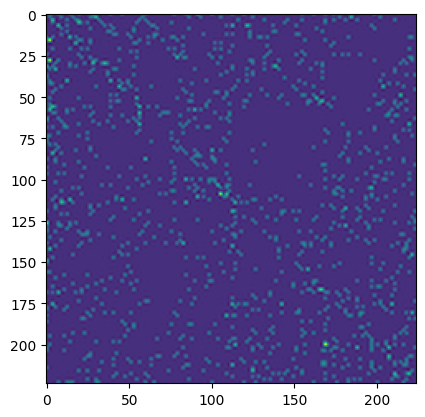

In [36]:
plt.imshow(test[1]['image'])